In [22]:
import pandas as pd
import numpy as np
import helper
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import datetime as dt
style.use('markerr.mplstyle')

In [2]:
zri = pd.read_csv('long_interpolated_target.csv', index_col = 0,
                   parse_dates=['Time']
                  )
new_biz_owner = pd.read_csv('new_biz_taxpayer.csv', index_col = 1,
                   parse_dates={'Time':['year','month']}
                  )
new_biz_outlet = pd.read_csv('new_biz_outlet.csv', index_col = 1,
                   parse_dates={'Time':['year','month']}
                  )
sales_tax = pd.read_csv('sales_tax_allocation.csv', index_col = 1,
                   parse_dates={'Time':['year','month']}
                  )
econ = pd.read_csv('key_econ.csv', 
                   index_col = 1,
                   parse_dates={'Time':['Year','Month']}
                  )

In [3]:
## all new biz stuff should end in august because we don't have a full month of reporting.

new_biz_owner

,Time,zip_code,taxpayer_count,taxpayer_org_type_cl,taxpayer_org_type_is,taxpayer_org_type_foreign,payer_outlet_same_zipcode
0,2012-01-01,75002.0,15,4,6,1,12
1,2012-01-01,75010.0,2,1,0,0,1
2,2012-01-01,75013.0,8,4,3,0,7
3,2012-01-01,75019.0,5,0,1,0,2
4,2012-01-01,75022.0,10,5,3,0,5
...,...,...,...,...,...,...,...
24217,2021-12-01,75230.0,1,1,0,0,1
24218,2021-12-01,77479.0,1,1,0,0,1
24219,2021-12-01,77494.0,1,1,0,0,1
24220,2021-12-01,78258.0,2,2,0,0,0


In [83]:
# Create list of dates from 01-01-2012 to most recent in covid data
dates_list = []
new_date = pd.to_datetime('01-01-2012')
end_date = pd.to_datetime('09-01-2021')

while new_date != end_date:
    dates_list.append(new_date)
    new_date += pd.DateOffset(months=1)
dates = pd.DataFrame(dates_list)
dates.columns = ['Time']
dates.loc[:,'merge_col'] = 'merge'

zip_codes = pd.DataFrame({'zip_code':list(zri.zip_code.unique())})
zip_codes.loc[:,'merge_col'] = 'merge'

date_zip_map = dates.merge(zip_codes, how = 'left', on = 'merge_col')
date_zip_map = date_zip_map[['Time','zip_code']]
new_biz_owner_test = date_zip_map.merge(new_biz_owner, how = 'left', on = ['Time','zip_code'])

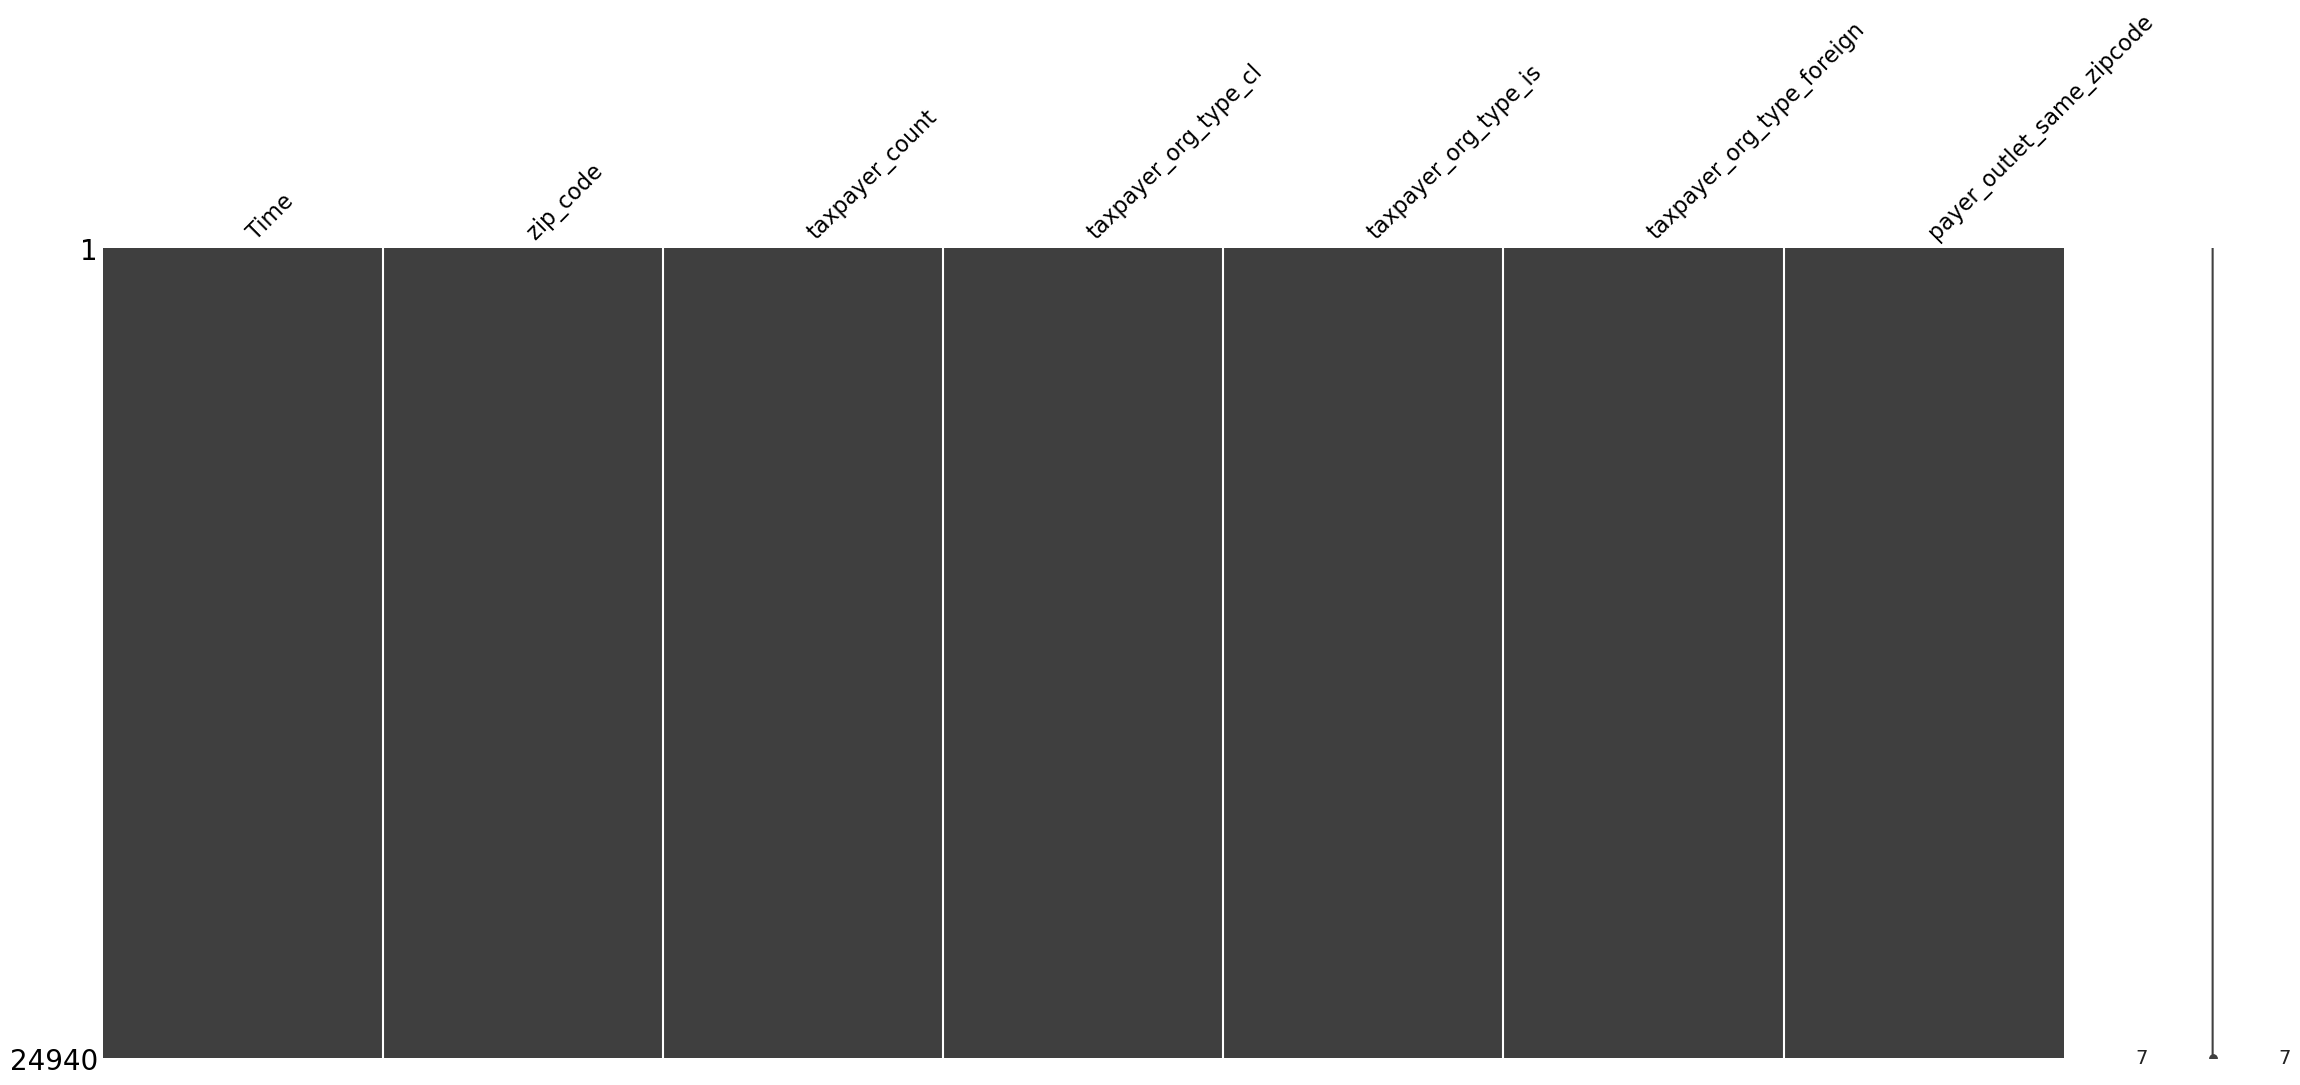

In [86]:
msno.matrix(new_biz_owner_test.fillna(0))
plt.show()

## this is a great cleaning strat

In [29]:
new_biz_owner.loc[new_biz_owner['Time']< dt.datetime(2021,8,2),:]


,Time,zip_code,taxpayer_count,taxpayer_org_type_cl,taxpayer_org_type_is,taxpayer_org_type_foreign,payer_outlet_same_zipcode
0,2012-01-01,75002.0,15,4,6,1,12
1,2012-01-01,75010.0,2,1,0,0,1
2,2012-01-01,75013.0,8,4,3,0,7
3,2012-01-01,75019.0,5,0,1,0,2
4,2012-01-01,75022.0,10,5,3,0,5
...,...,...,...,...,...,...,...
23700,2021-08-01,78757.0,5,2,1,0,4
23701,2021-08-01,78758.0,11,6,5,0,8
23702,2021-08-01,78759.0,17,8,4,2,11
23703,2021-08-01,79912.0,25,10,10,0,17


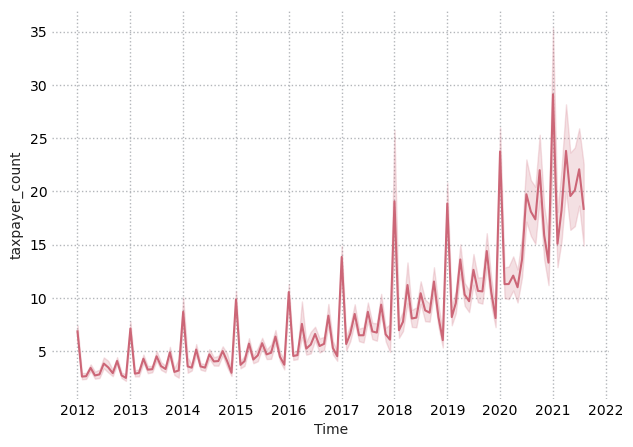

In [33]:
sns.lineplot(data = new_biz_owner.loc[new_biz_owner['Time']< dt.datetime(2021,8,2),:], 
             x='Time',y = 'taxpayer_count')
plt.show()

#### taxpayer_org_type_cl

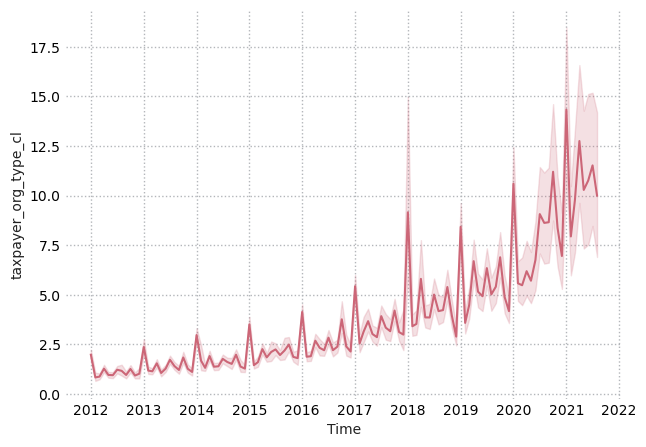

In [35]:
sns.lineplot(data = new_biz_owner.loc[new_biz_owner['Time']< dt.datetime(2021,8,2),:], 
             x='Time',y = 'taxpayer_org_type_cl')
plt.show()

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


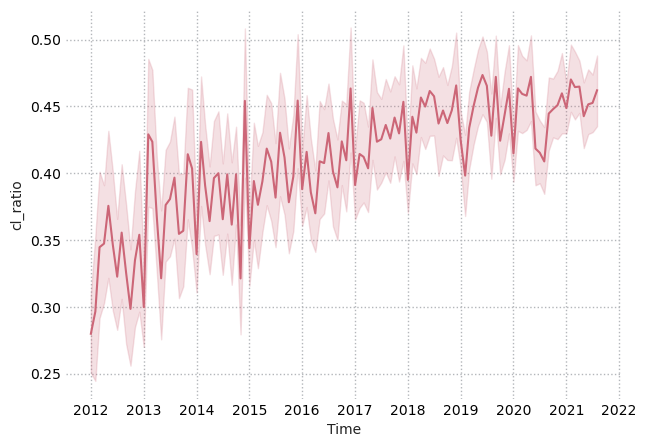

In [41]:
graph_df = new_biz_owner.loc[new_biz_owner['Time']< dt.datetime(2021,8,2),:]
graph_df.loc[:,'cl_ratio'] = graph_df.loc[:,'taxpayer_org_type_cl']/graph_df.loc[:,'taxpayer_count']
sns.lineplot(data = graph_df, 
             x='Time',y = 'cl_ratio')
plt.show()

#### taxpayer_org_type_is

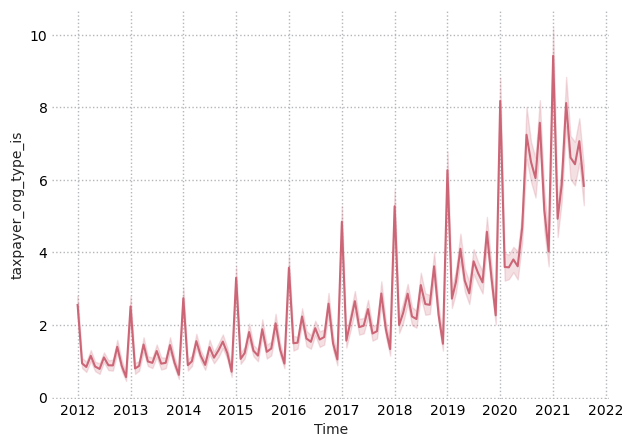

In [37]:
sns.lineplot(data = new_biz_owner.loc[new_biz_owner['Time']< dt.datetime(2021,8,2),:], 
             x='Time',y = 'taxpayer_org_type_is')
plt.show()

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


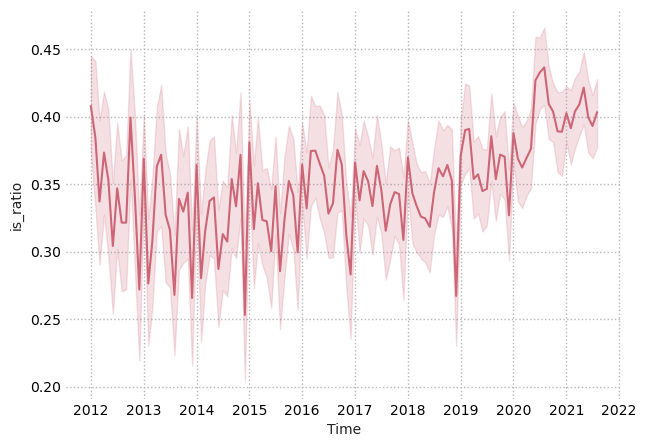

In [42]:
graph_df = new_biz_owner.loc[new_biz_owner['Time']< dt.datetime(2021,8,2),:]
graph_df.loc[:,'is_ratio'] = graph_df.loc[:,'taxpayer_org_type_is']/graph_df.loc[:,'taxpayer_count']
sns.lineplot(data = graph_df, 
             x='Time',y = 'is_ratio')
plt.show()

#### foreign comp

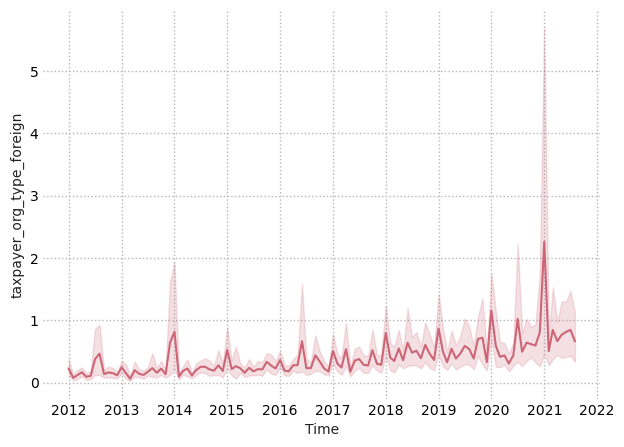

In [38]:
sns.lineplot(data = new_biz_owner.loc[new_biz_owner['Time']< dt.datetime(2021,8,2),:], 
             x='Time',y = 'taxpayer_org_type_foreign')
plt.show()

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


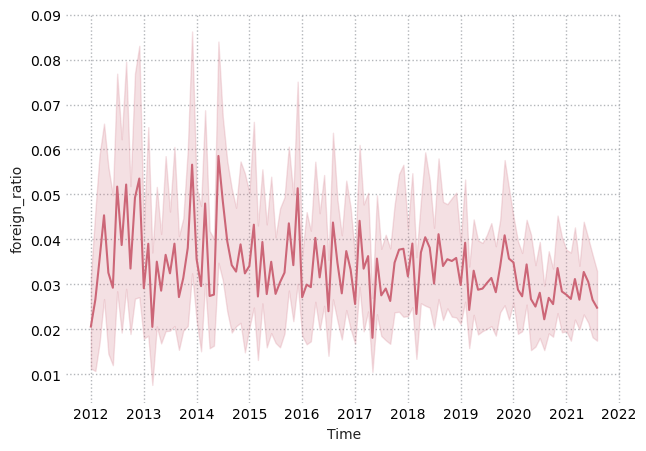

In [43]:
graph_df = new_biz_owner.loc[new_biz_owner['Time']< dt.datetime(2021,8,2),:]
graph_df.loc[:,'foreign_ratio'] = graph_df.loc[:,'taxpayer_org_type_foreign']/graph_df.loc[:,'taxpayer_count']
sns.lineplot(data = graph_df, 
             x='Time',y = 'foreign_ratio')
plt.show()

#### same zipcode

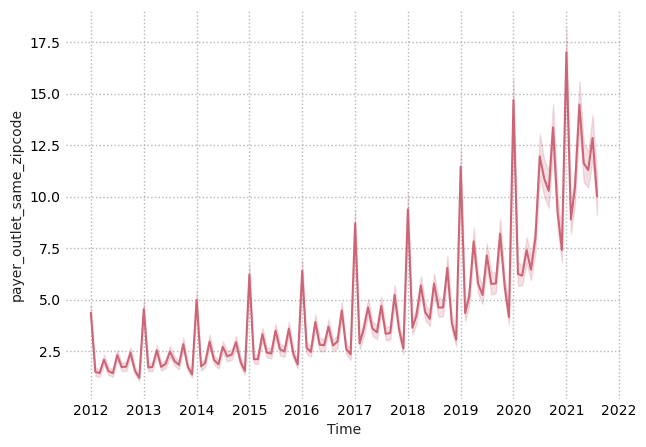

In [39]:
sns.lineplot(data = new_biz_owner.loc[new_biz_owner['Time']< dt.datetime(2021,8,2),:], 
             x='Time',y = 'payer_outlet_same_zipcode')
plt.show()

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


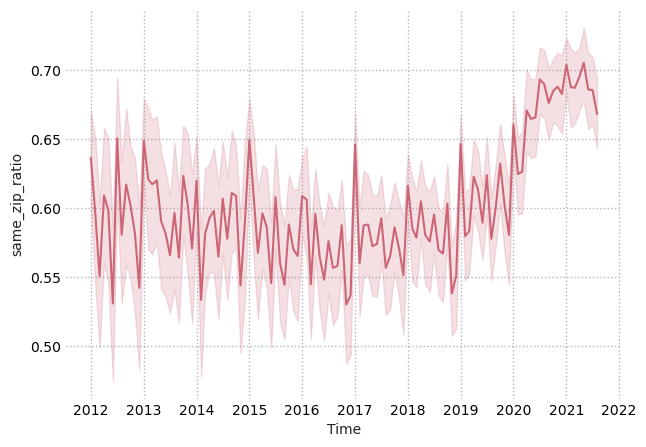

In [45]:
graph_df = new_biz_owner.loc[new_biz_owner['Time']< dt.datetime(2021,8,2),:]
graph_df.loc[:,'same_zip_ratio'] = graph_df.loc[:,'payer_outlet_same_zipcode']/graph_df.loc[:,'taxpayer_count']
sns.lineplot(data = graph_df, 
             x='Time',y = 'same_zip_ratio')
plt.show()

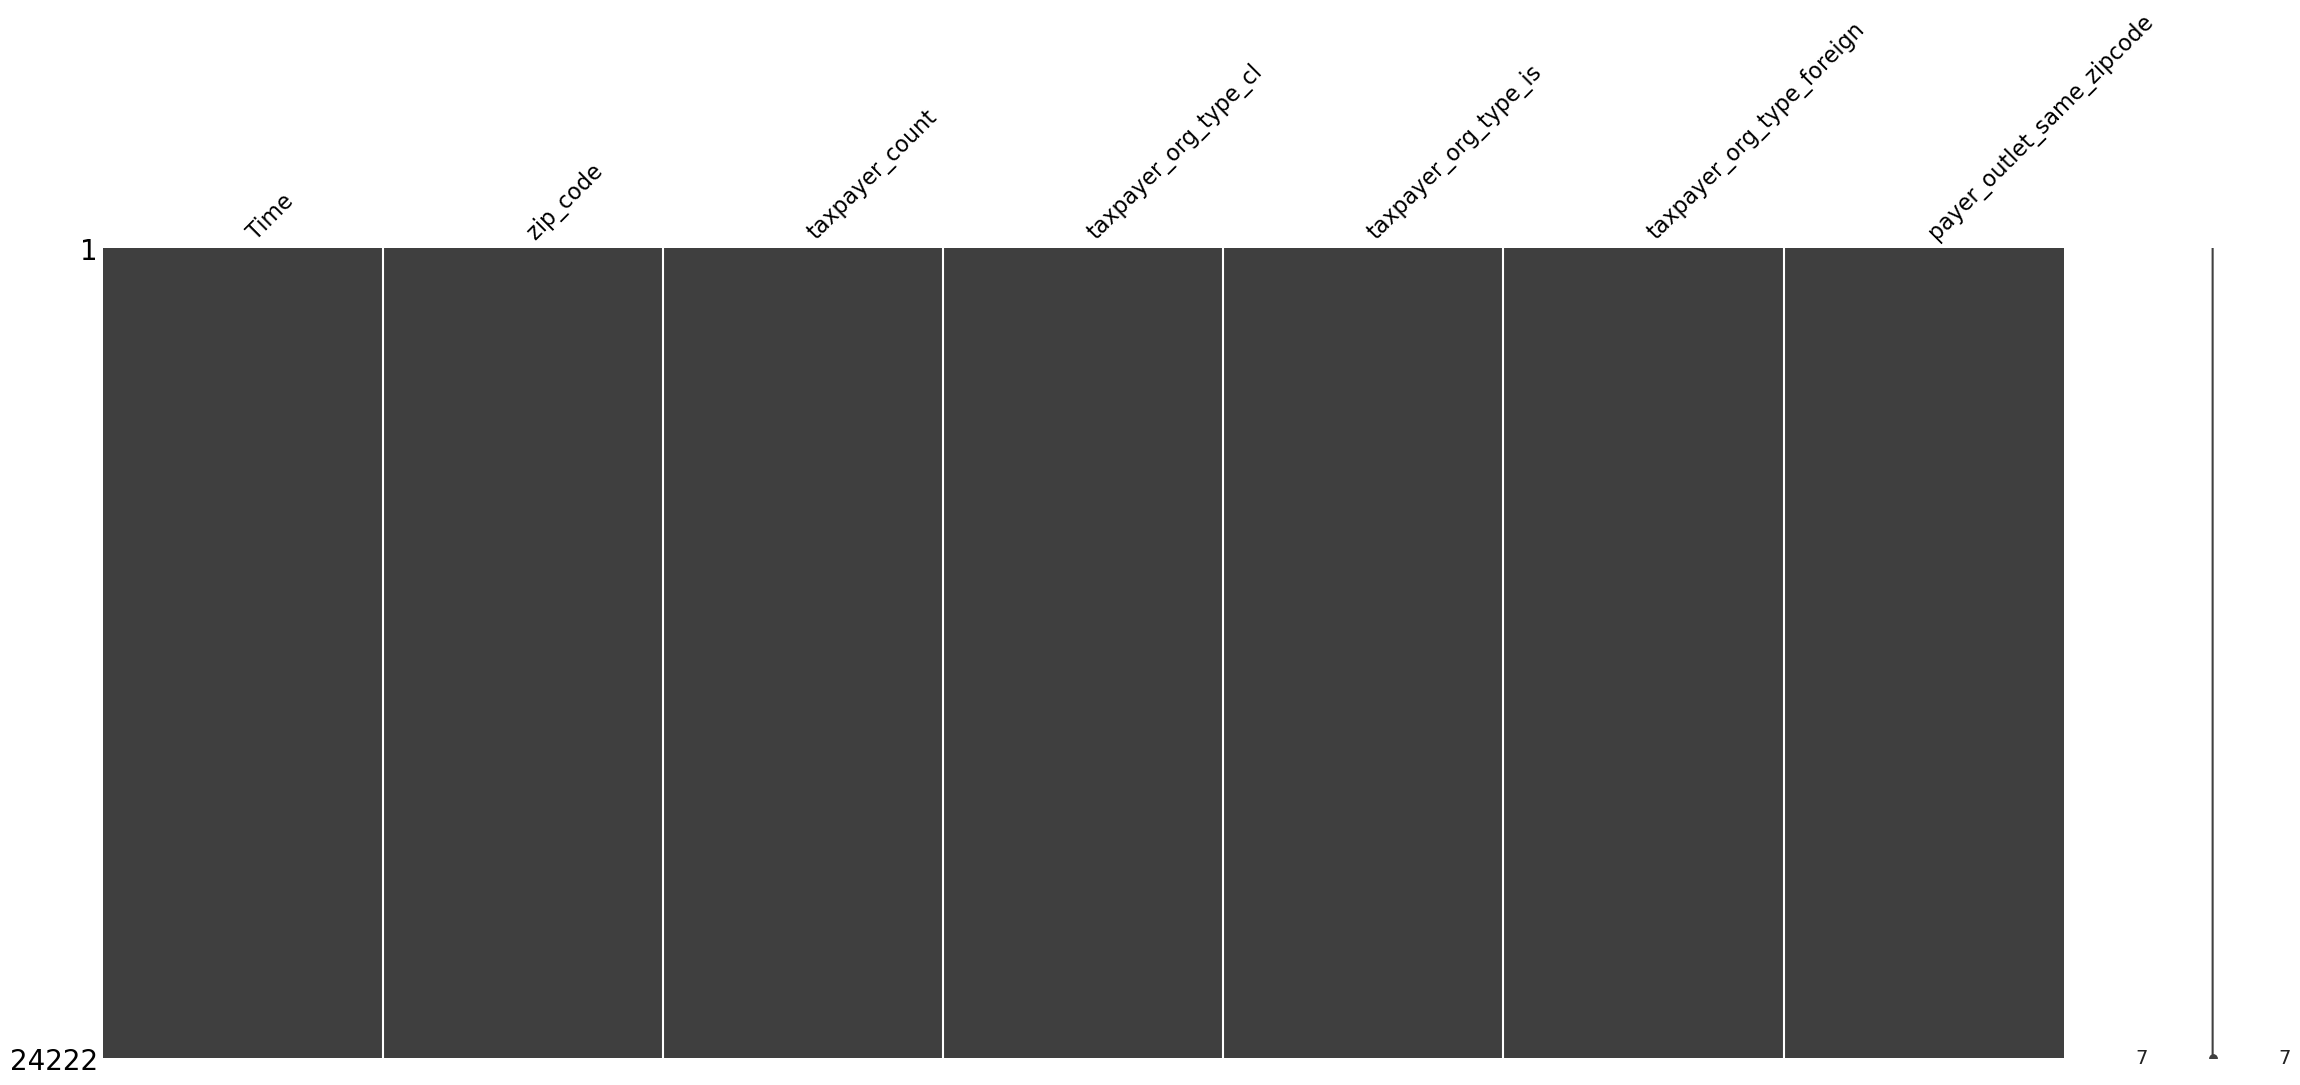

In [4]:
msno.matrix(new_biz_owner)
plt.show()

In [5]:
new_biz_outlet

,Time,zip_code,outlet_count,outlet_taxpayer_non_tx,outlet_org_type_cl,outlet_org_type_is,outlet_org_type_foreign
0,2012-01-01,75002,15,0,4,6,2
1,2012-01-01,75010,3,0,0,1,0
2,2012-01-01,75013,9,0,5,2,0
3,2012-01-01,75019,4,1,1,2,0
4,2012-01-01,75022,6,1,3,2,1
...,...,...,...,...,...,...,...
24625,2021-12-01,76244,1,0,1,0,0
24626,2021-12-01,77433,1,0,1,0,0
24627,2021-12-01,77479,1,0,1,0,0
24628,2021-12-01,77494,1,0,1,0,0


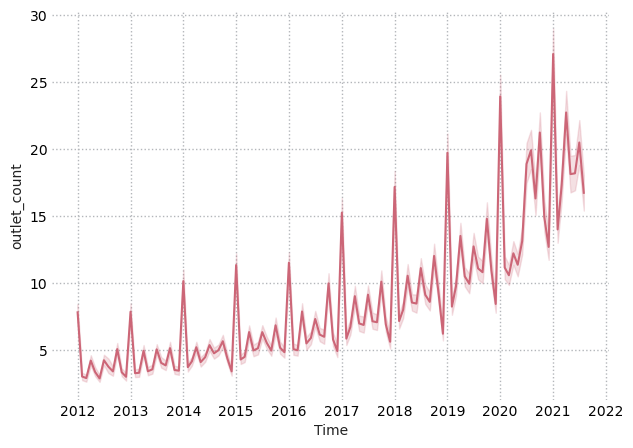

In [47]:
sns.lineplot(data = new_biz_outlet.loc[new_biz_outlet['Time']< dt.datetime(2021,8,2),:], 
             x='Time',y = 'outlet_count')
plt.show()

#### non tx

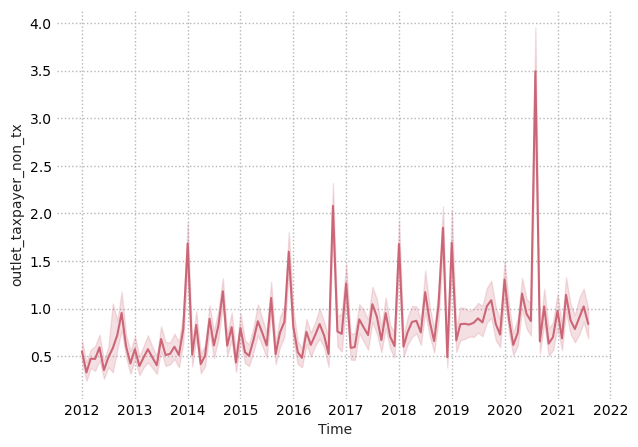

In [49]:
sns.lineplot(data = new_biz_outlet.loc[new_biz_outlet['Time']< dt.datetime(2021,8,2),:], 
             x='Time',y = 'outlet_taxpayer_non_tx')
plt.show()

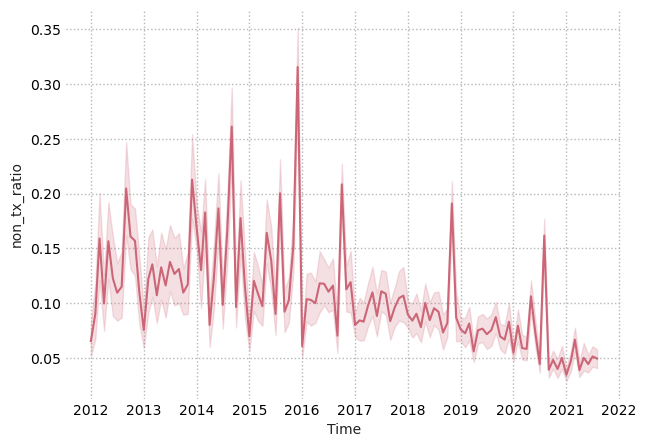

In [51]:
graph_df = new_biz_outlet.loc[new_biz_outlet['Time']< dt.datetime(2021,8,2),:]
graph_df.loc[:,'non_tx_ratio'] = graph_df.loc[:,'outlet_taxpayer_non_tx']/graph_df.loc[:,'outlet_count']
sns.lineplot(data = graph_df, 
             x='Time',y = 'non_tx_ratio')
plt.show()

#### outlet_org_type_cl

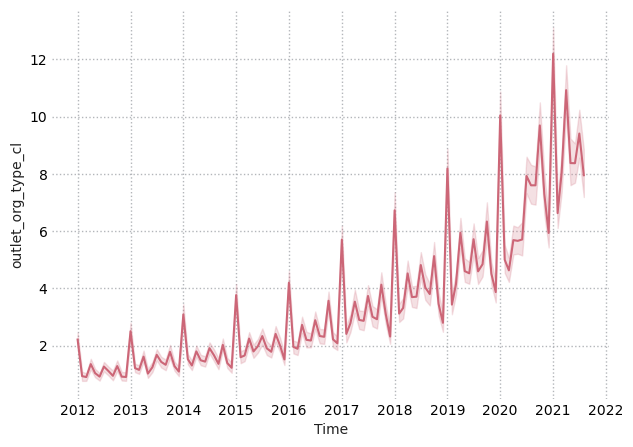

In [53]:
sns.lineplot(data = new_biz_outlet.loc[new_biz_outlet['Time']< dt.datetime(2021,8,2),:], 
             x='Time',y = 'outlet_org_type_cl')
plt.show()

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


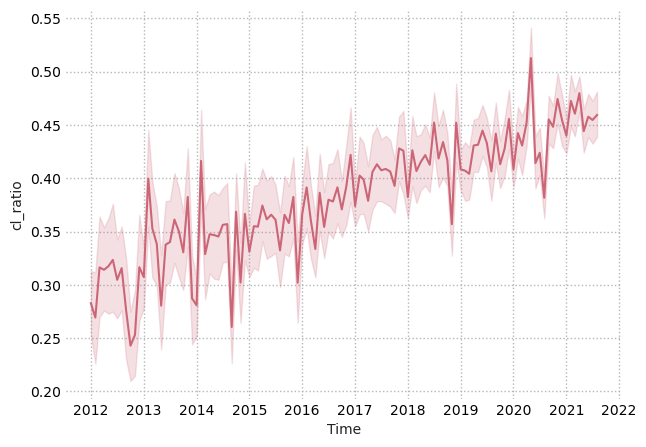

In [54]:
graph_df = new_biz_outlet.loc[new_biz_outlet['Time']< dt.datetime(2021,8,2),:]
graph_df.loc[:,'cl_ratio'] = graph_df.loc[:,'outlet_org_type_cl']/graph_df.loc[:,'outlet_count']
sns.lineplot(data = graph_df, 
             x='Time',y = 'cl_ratio')
plt.show()

#### outlet_org_type_is

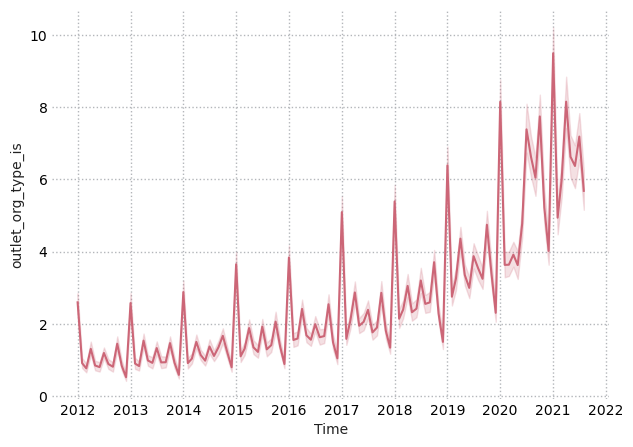

In [55]:
sns.lineplot(data = new_biz_outlet.loc[new_biz_outlet['Time']< dt.datetime(2021,8,2),:], 
             x='Time',y = 'outlet_org_type_is')
plt.show()

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


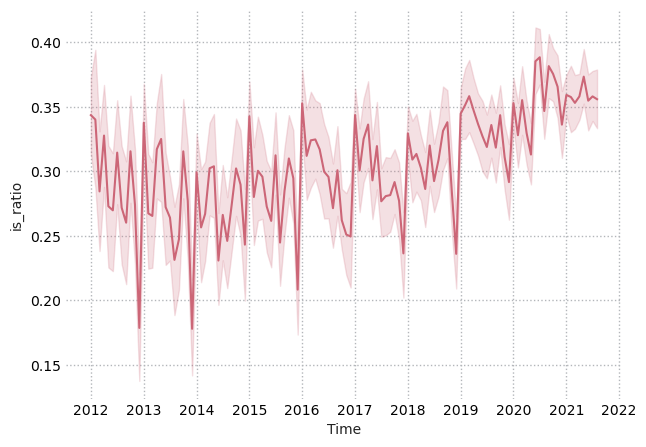

In [56]:
graph_df = new_biz_outlet.loc[new_biz_outlet['Time']< dt.datetime(2021,8,2),:]
graph_df.loc[:,'is_ratio'] = graph_df.loc[:,'outlet_org_type_is']/graph_df.loc[:,'outlet_count']
sns.lineplot(data = graph_df, 
             x='Time',y = 'is_ratio')
plt.show()

#### outlet_org_type_foreign

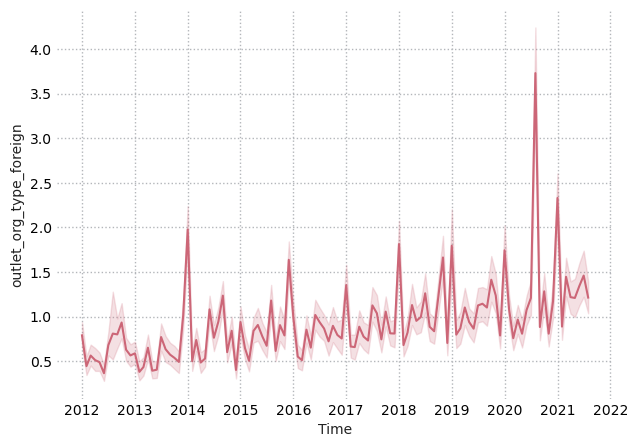

In [58]:
sns.lineplot(data = new_biz_outlet.loc[new_biz_outlet['Time']< dt.datetime(2021,8,2),:], 
             x='Time',y = 'outlet_org_type_foreign')
plt.show()

/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


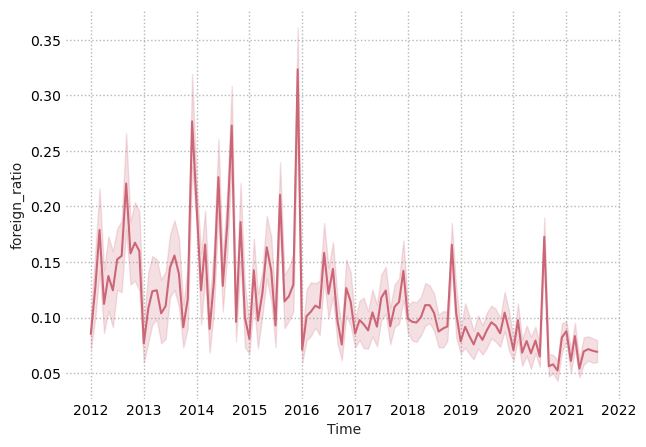

In [59]:
graph_df = new_biz_outlet.loc[new_biz_outlet['Time']< dt.datetime(2021,8,2),:]
graph_df.loc[:,'foreign_ratio'] = graph_df.loc[:,'outlet_org_type_foreign']/graph_df.loc[:,'outlet_count']
sns.lineplot(data = graph_df, 
             x='Time',y = 'foreign_ratio')
plt.show()

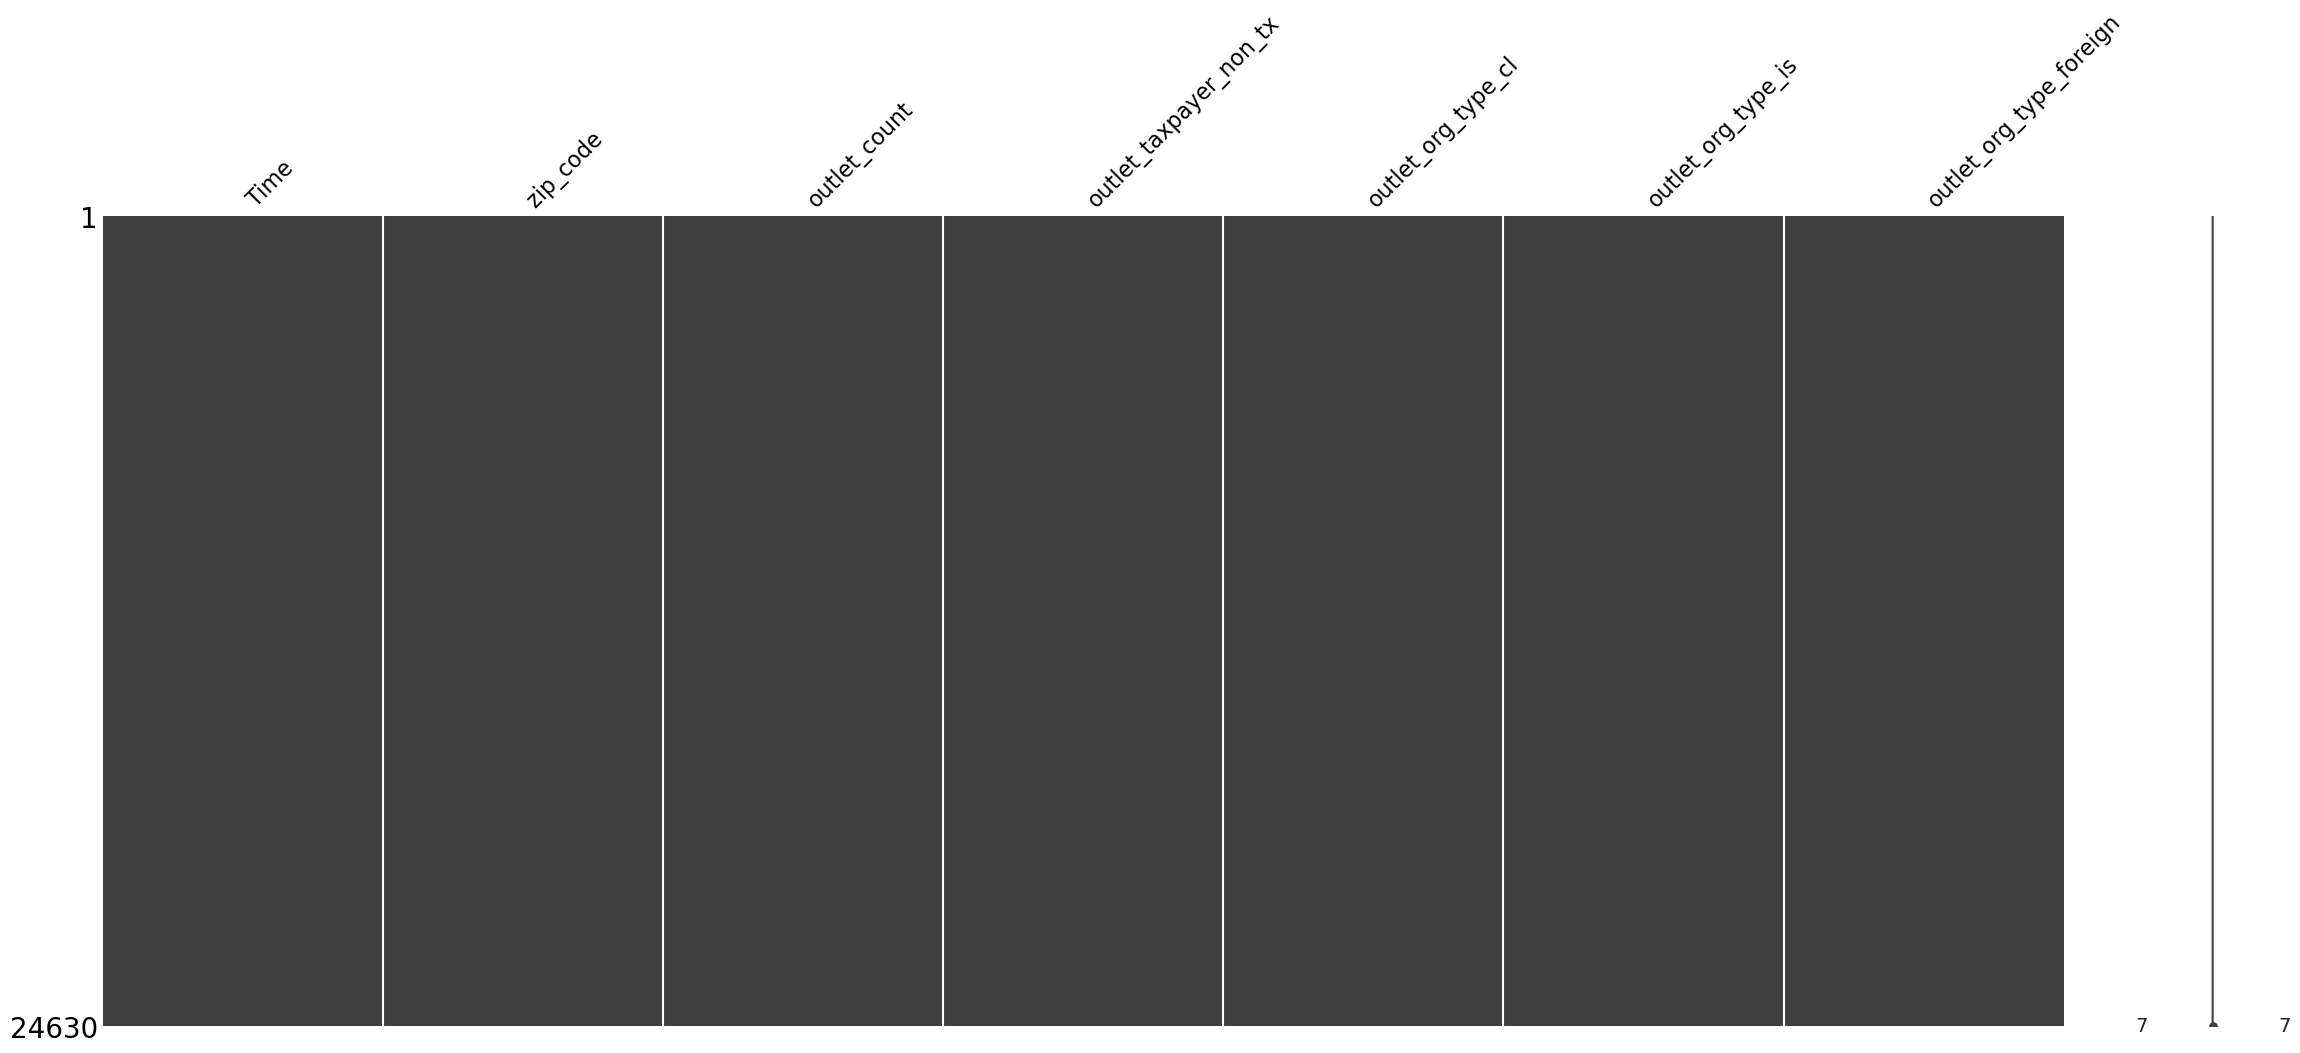

In [48]:
msno.matrix(new_biz_outlet)
plt.show()

In [9]:
sales_tax

,Time,zip_code,sales_tax_rate,total_sales_tax,total_sales_tax_last_year,per_diff_total_sales_tax,city
0,2016-07-01,75002.0,2.0,2920296.40,2572824.66,13.50,ALLEN
1,2016-08-01,75002.0,2.0,3787723.89,3522837.47,7.51,ALLEN
2,2016-06-01,75002.0,2.0,2861305.84,2667427.33,7.26,ALLEN
3,2013-01-01,75002.0,2.0,2442218.19,2316570.68,5.42,ALLEN
4,2013-02-01,75002.0,2.0,3633751.08,3495775.57,3.94,ALLEN
...,...,...,...,...,...,...,...
22570,2021-05-01,79936.0,1.0,10975509.18,8039429.45,36.52,EL PASO
22571,2021-06-01,79936.0,1.0,9309325.97,6680305.17,39.35,EL PASO
22572,2021-07-01,79936.0,1.0,9617957.43,7724895.87,24.50,EL PASO
22573,2021-08-01,79936.0,1.0,10898660.50,8907539.98,22.35,EL PASO


In [16]:
sales_tax[sales_tax['per_diff_total_sales_tax'].isna()]

,Time,zip_code,sales_tax_rate,total_sales_tax,total_sales_tax_last_year,per_diff_total_sales_tax,city
8591,2020-03-01,76065.0,2.0,1086612.33,0.0,NaN,MIDLOTHIAN


In [18]:
## need to fix the values the values for ['zip_code']==76065 for march 2020 and march 2019 

pd.set_option('display.max_rows', 105)
sales_tax[sales_tax['zip_code']==76065]

,Time,zip_code,sales_tax_rate,total_sales_tax,total_sales_tax_last_year,per_diff_total_sales_tax,city
8505,2016-07-01,76065.0,2.0,570732.36,464601.25,22.84,MIDLOTHIAN
8506,2016-06-01,76065.0,2.0,504984.91,510958.61,-1.16,MIDLOTHIAN
8507,2016-08-01,76065.0,2.0,663389.12,614581.29,7.94,MIDLOTHIAN
8508,2014-11-01,76065.0,2.0,601800.11,477165.66,26.11,MIDLOTHIAN
8509,2014-02-01,76065.0,2.0,1121427.35,505226.37,121.96,MIDLOTHIAN
8510,2016-01-01,76065.0,2.0,538577.21,492357.49,9.38,MIDLOTHIAN
8511,2016-04-01,76065.0,2.0,521124.85,416292.22,25.18,MIDLOTHIAN
8512,2014-04-01,76065.0,2.0,416530.58,345710.88,20.48,MIDLOTHIAN
8513,2014-08-01,76065.0,2.0,428484.21,476412.72,-10.06,MIDLOTHIAN
8514,2013-03-01,76065.0,2.0,358747.25,312136.23,14.93,MIDLOTHIAN


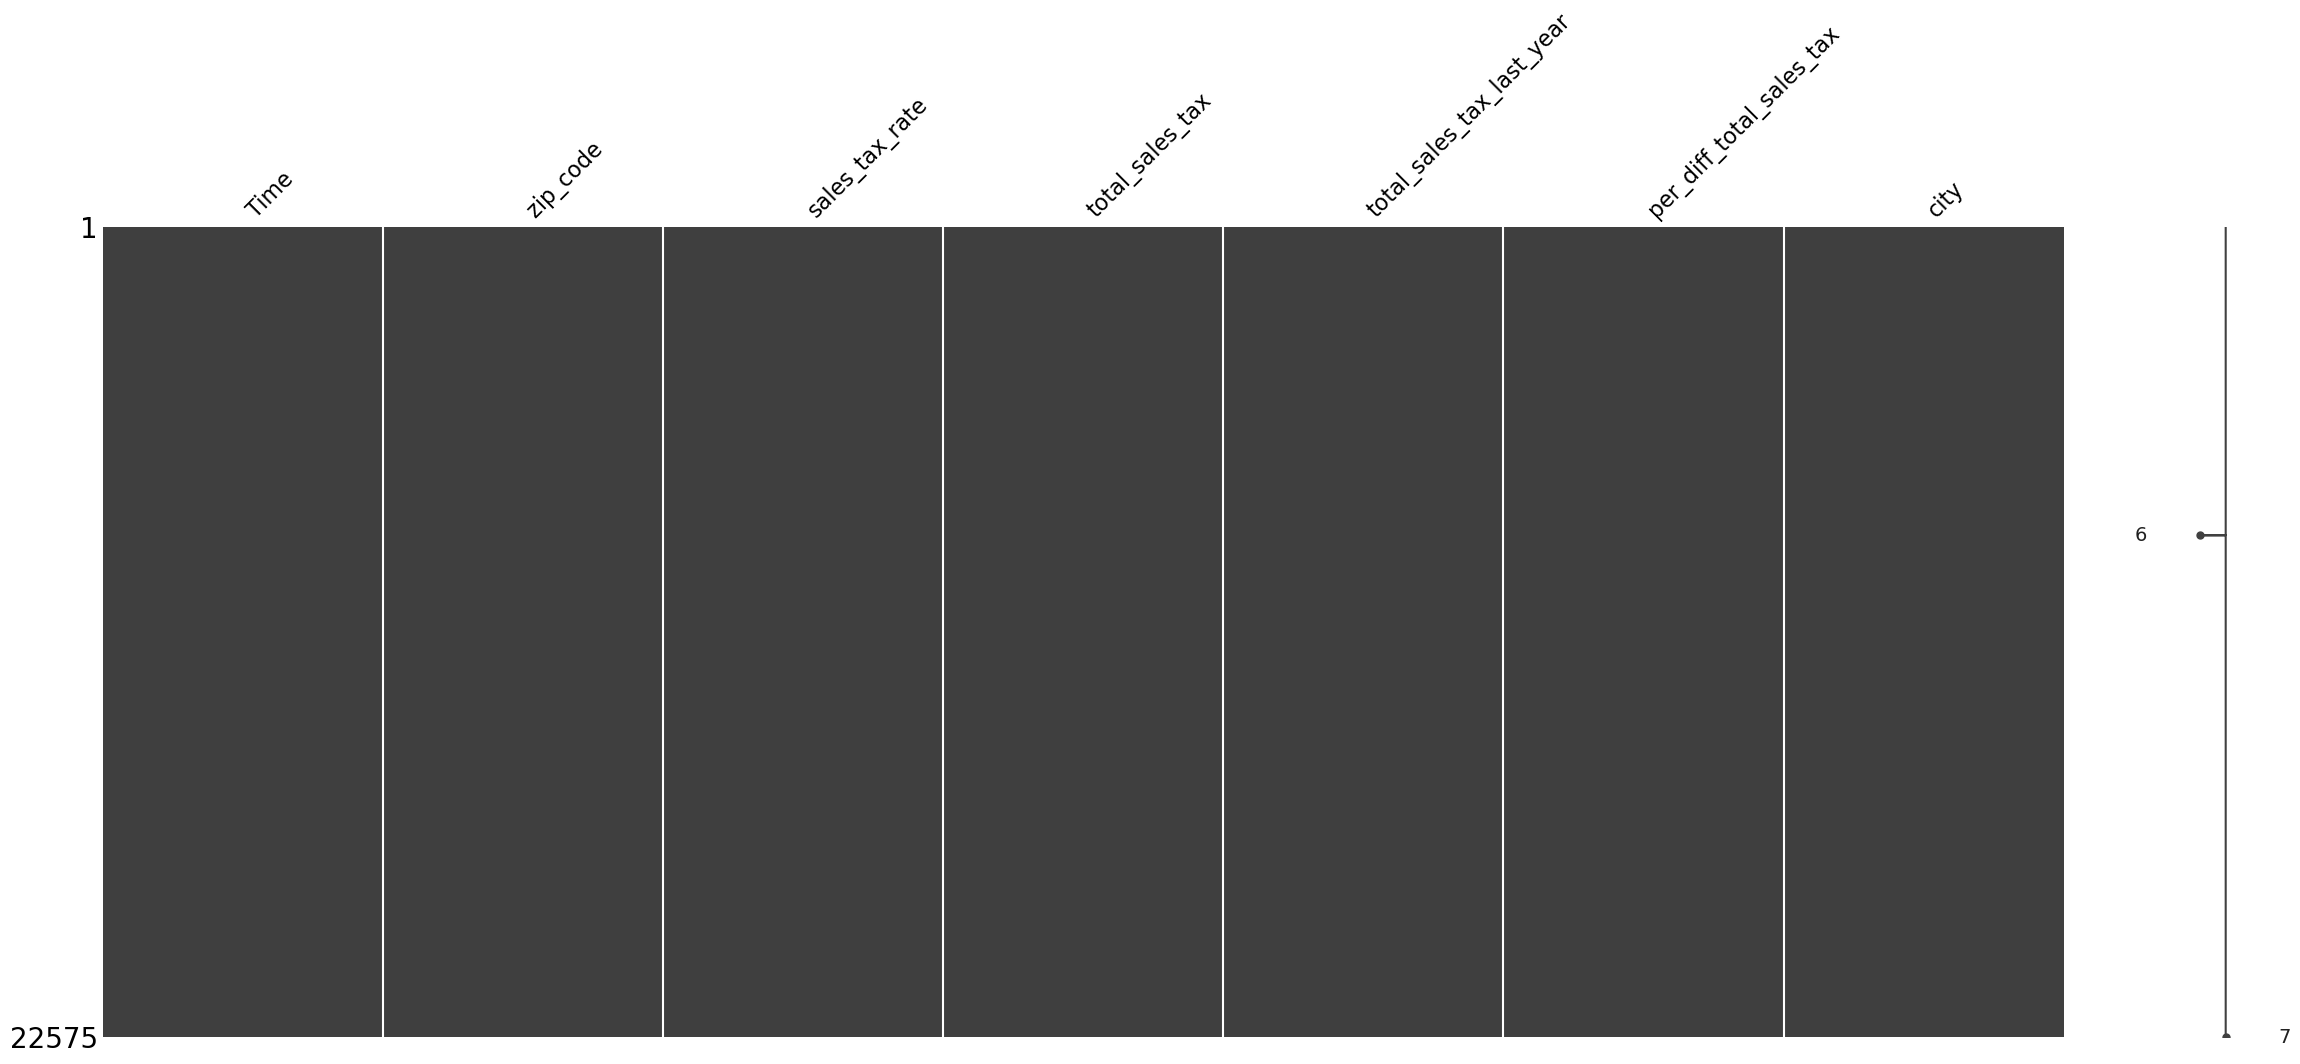

In [10]:
msno.matrix(sales_tax)
plt.show()

In [88]:
## remove the nans as the bottom of the graph.

econ[econ['zip_code']==78728].tail(20)

,Time,Consumer Confidence Index TX,Consumer Confidence West South Central,Consumer Confidence Index US,Consumer Price Index TX,Consumer Price Index U.S.,Nonfarm Employment TX,Nonfarm Employment U.S.,Unemployment TX,Unemployment U.S.,...,Nonfarm Employment Florida,Nonfarm Employment New York,Nonfarm Employment Texas,Nonfarm Employment California,Gross Value Crude Oil Production,Gross Value Natural Gas Production,Motor Fuel Taxed Gasoline,Motor Fuel Taxed Diesel,State,zip_code
21480,2020-04-01,92.6,91.4,85.7,231.827,256.389,11.517,130.161,12.9,14.8,...,7802.9,7852.4,11517.4,14946.1,2027.42,838.63,1045.4,395.1,TX,78728
21695,2020-05-01,97.8,97.0,85.9,231.354,256.394,11.757,132.994,11.6,13.3,...,8050.9,8011.3,11756.7,15132.7,1919.28,1215.42,788.4,341.0,TX,78728
21910,2020-06-01,106.5,103.7,98.3,233.254,257.797,11.970,137.840,10.2,11.1,...,8339.9,8223.8,11970.1,15611.7,4191.44,1112.44,959.0,316.5,TX,78728
22125,2020-07-01,89.8,88.8,91.7,234.972,259.101,11.994,139.566,9.3,10.2,...,8399.6,8361.8,11993.5,15664.6,4904.38,1110.96,1120.0,426.0,TX,78728
22340,2020-08-01,101.4,95.0,86.3,234.478,259.198,12.079,141.149,6.9,8.4,...,8399.5,8548.5,12079.3,15757.8,5070.92,1600.82,1079.7,384.2,TX,78728
22555,2020-09-01,104.6,102.1,101.8,235.296,260.280,12.146,141.865,7.9,7.8,...,8460.8,8747.2,12145.8,15874.1,4491.48,1555.81,1126.4,374.3,TX,78728
22770,2020-10-01,104.1,100.0,101.4,235.321,260.388,12.249,142.545,7.3,6.9,...,8473.8,8749.7,12248.6,15963.4,4648.04,1647.57,1065.8,385.6,TX,78728
22985,2020-11-01,112.0,100.6,92.9,234.644,260.229,12.300,142.809,7.2,6.7,...,8474.6,8753.6,12299.5,16013.3,4766.99,2026.60,1128.4,531.5,TX,78728
23200,2020-12-01,86.9,84.4,87.1,235.079,260.474,12.365,142.503,6.9,6.7,...,8492.0,8723.3,12365.2,15937.9,5622.07,1891.11,1057.6,359.0,TX,78728
23415,2021-01-01,100.7,94.0,87.1,236.941,261.582,12.404,142.736,6.8,6.3,...,8492.5,8768.6,12404.2,15857.9,6323.52,1680.74,1091.5,401.7,TX,78728


In [89]:
econ.shape

(25585, 30)

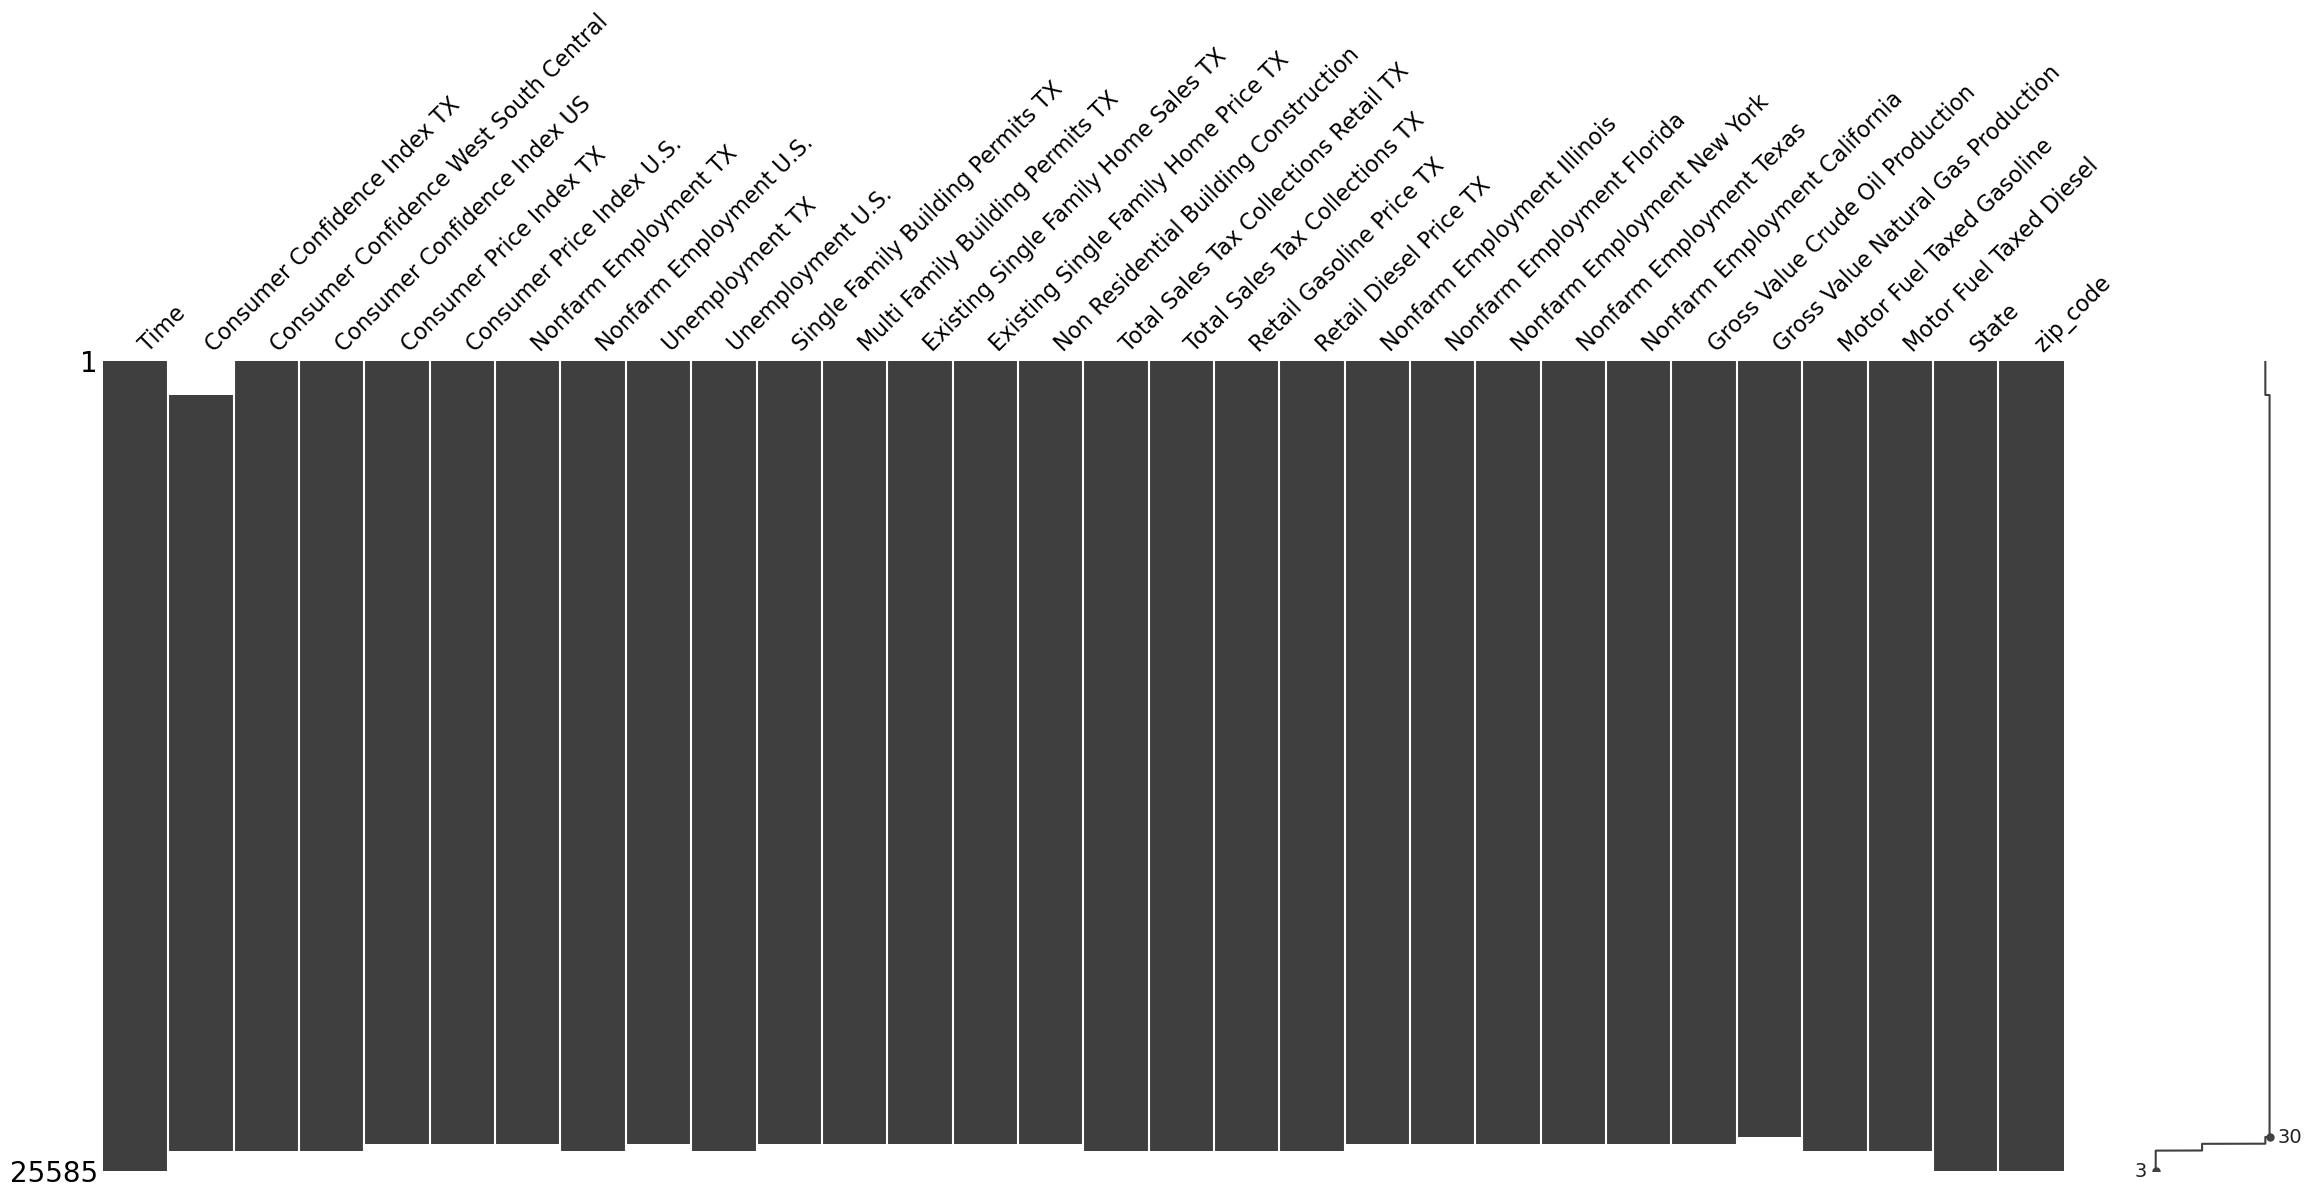

In [12]:
msno.matrix(econ)
plt.show()

In [19]:
merge_text_1 = pd.DataFrame({'test_1':[1,2,3,4],'merge_col':['a','a','a','a']})

merge_text_2 = pd.DataFrame({'test_2':['butt','cat','horse','rabbit'],'merge_col':['a','a','a','a']})

test_thing = merge_text_1.merge(merge_text_2, how= 'left',on = 'merge_col')